In [1]:
#加载预处理数据将会用到的库
import pandas as pd
import seaborn as sns
from scipy import stats,integrate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# 加载数据
datas = pd.read_csv('datas.csv')
datas.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


从上述数据中可以发现PassengerId为ID自增列数据，属于无用数据

In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null float64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


In [4]:
datas.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


从上述数据统计中可以发现在Age， Embarked中存在缺失值

In [5]:
# 移除无用列 passengerId
datas.drop(['PassengerId'], axis=1, inplace=True)
datas.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

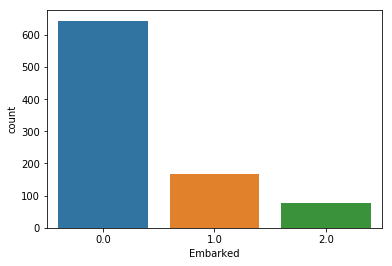

In [6]:
#处理缺失值
    #Embarked
        #查看Embarked各数据出现次数
sns.countplot(datas.Embarked.dropna())
datas.Embarked.value_counts()

从数据出现次数来看，Embarked为离散型数据，且绝大多数出现都为0，采用众数0填充

In [7]:
datas.Embarked.fillna(0, inplace=True)

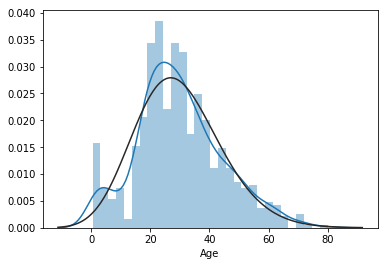

In [8]:
    #Age
    #查看Age各数据出现次数
datas.Age.value_counts()
sns.distplot(datas.Age.dropna(), kde=True, bins=30, fit=stats.gamma)

从数据出现次数来看，Age连续数据，可采用预测填充

In [9]:
# 首先对数据进行抽取，将数据分为年龄已知数据和年龄未知数据
datas_age = datas[[ 'Age', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
known_age_datas = datas_age.loc[datas_age.Age.notnull()].as_matrix()
unknow_age_datas = datas_age.loc[datas_age.Age.isnull()].as_matrix()
#梳理年龄预测用数据
x = known_age_datas[:, 1:]
x_test = unknow_age_datas[:, 1:]
y = known_age_datas[:, 0]
#采用随机森林进行预测
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rfr.fit(x, y)
pred = rfr.predict(x_test)
datas.loc[datas.Age.isnull(), 'Age'] = pred

In [10]:
datas.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.623255,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.847898,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [11]:
#导入绘制图形将会用到的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [12]:
#绘制图形函数


#绘制混淆矩阵图
def plot_confusion_matrix(model_name, conf_mat):
    #定义热图颜色
    ddl_heat = ['#0066FF', '#247CFF',  '#3E8BFF', '#4D94FF', '#5B9DFF', '#6EA8FF',
                '#7CB1FF', '#8EBCFF', '#9EC5FF', '#C0DAFF', '#DFECFF', '#E8F1FF']
    ddlheatmap = colors.ListedColormap(ddl_heat)
    # 绘制热图
    plt.imshow(conf_mat, interpolation='nearest', cmap=ddlheatmap)
    plt.title('{model_name} Confusion Matrix'.format(model_name=model_name))
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

#绘制PR图
def plot_precision_recall(model_name, precision, recall):
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title( '{model_name} 2-class Precision-Recall'.format(model_name=model_name))
    plt.show()

In [13]:
#导入评估分析模型要用到的库
from sklearn import metrics

In [14]:
#模型评估函数
#模型评估
def model_evaluation(train_true, train_pred, test_true, test_pred, pred_score):
    train_score = metrics.accuracy_score(train_true, train_pred)
    test_score = metrics.accuracy_score(test_true, test_pred)
    mse = metrics.mean_squared_error(test_true, test_pred)
    r2score = metrics.r2_score(test_true, test_pred)
    conf_mat = metrics.confusion_matrix(test_true, test_pred)
    precision, recall, _ = metrics.precision_recall_curve(test_true, pred_score)
    return train_score, test_score, mse, r2score, conf_mat, precision, recall

#模型分析
def auto_model_analysis(model_name, train_true, train_pred, test_true, test_pred, pred_score):
    train_score, test_score, mse, r2score, conf_mat, precision, recall = model_evaluation(train_true, train_pred,
                                                                                          test_true, test_pred,
                                                                                          pred_score)

    print("{model_name}模型训练集准确率：{train_score}".format(model_name=model_name, train_score=train_score))
    print("{model_name}模型验证集准确率：{test_score}".format(model_name=model_name, test_score=test_score))
    print("{model_name}模型均方误差：{mse}".format(model_name=model_name, mse=mse))
    print("{model_name}模型R2-score：{r2score}".format(model_name=model_name, r2score=r2score))
    print("{model_name}模型混淆矩阵：{conf_mat}".format(model_name=model_name, conf_mat=conf_mat))

    plot_confusion_matrix(model_name, conf_mat)
    plot_precision_recall(model_name, precision, recall)

In [15]:
a = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare']
# 获取列名
columns = datas.columns.values.tolist()
columns_label = columns[0:1]
columns_train = columns[1:]
scaler = StandardScaler()
datas_train = datas.copy()
datas_train.Age= scaler.fit_transform(datas_train.Age.values.reshape(-1, 1))
datas_train.Fare = scaler.fit_transform(datas_train.Fare.values.reshape(-1, 1))
X_train, X_test, Y_train, Y_test = train_test_split(datas_train[columns_train].as_matrix(), 
                                                    datas_train[columns_label].as_matrix().reshape(-1), 
                                                    test_size=0.3, random_state=0)

对数几率回归模型参数：LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
logistic_regression模型训练集准确率：0.812199036918138
logistic_regression模型验证集准确率：0.8134328358208955
logistic_regression模型均方误差：0.1865671641791045
logistic_regression模型R2-score：0.20238095238095233
logistic_regression模型混淆矩阵：[[149  19]
 [ 31  69]]


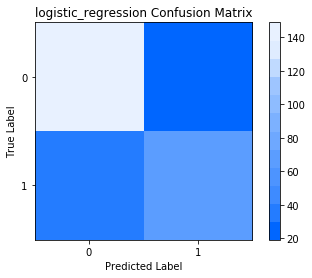

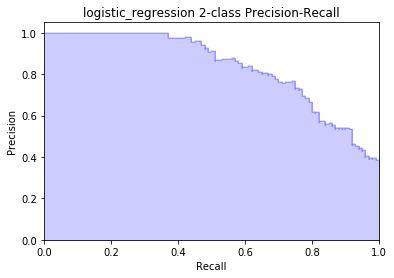

In [16]:
#对数几率回归模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', C=0.1, multi_class='ovr', penalty='l2', max_iter=5000)
lr.fit(X_train, Y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
pre_score = lr.predict_proba(X_test)[:, 1]
print("对数几率回归模型参数：{parameter}".format(parameter=lr))
auto_model_analysis("logistic_regression", Y_train, train_pred, Y_test, test_pred, pre_score)

决策树模型参数：DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
decision tree模型训练集准确率：0.8523274478330658
decision tree模型验证集准确率：0.8246268656716418
decision tree模型均方误差：0.17537313432835822
decision tree模型R2-score：0.25023809523809526
decision tree模型混淆矩阵：[[156  12]
 [ 35  65]]


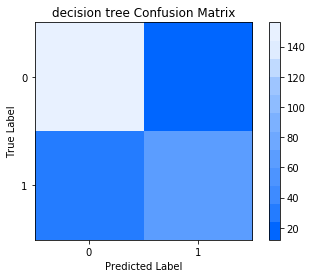

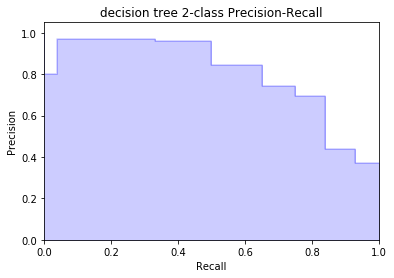

In [17]:
#决策树
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth=4)
tree.fit(X_train, Y_train)
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)
pre_score = tree.predict_proba(X_test)[:, 1]
print("决策树模型参数：{parameter}".format(parameter=tree))
auto_model_analysis("decision tree", Y_train, train_pred, Y_test, test_pred, pre_score)

神经网络学习率：0.02
神经网络正则化：0.05
神经网络模型参数：MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 28, 56, 2), learning_rate='constant',
       learning_rate_init=0.02, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
neural network模型训练集准确率：0.8346709470304976
neural network模型验证集准确率：0.8246268656716418
neural network模型均方误差：0.17537313432835822
neural network模型R2-score：0.25023809523809526
neural network模型混淆矩阵：[[153  15]
 [ 32  68]]


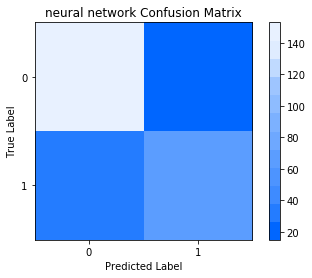

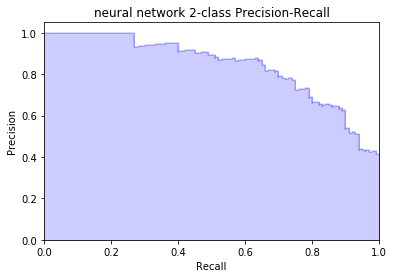

In [18]:
#神经网络
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd', activation='tanh', hidden_layer_sizes=(7, 28, 56, 2), 
                    alpha=0.05, learning_rate_init=0.02, max_iter=10000)
mlp.fit(X_train, Y_train)
train_pred = mlp.predict(X_train)
test_pred = mlp.predict(X_test)
pre_score = mlp.predict_proba(X_test)[:, 1]
print("神经网络学习率：{rate}".format(rate=mlp.learning_rate_init))
print("神经网络正则化：{aplha}".format(aplha=mlp.alpha))
print("神经网络模型参数：{parameter}".format(parameter=mlp))
auto_model_analysis("neural network", Y_train, train_pred, Y_test, test_pred, pre_score)

支持向量机模型参数：SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=5000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svc模型训练集准确率：0.8507223113964687
svc模型验证集准确率：0.8246268656716418
svc模型均方误差：0.17537313432835822
svc模型R2-score：0.25023809523809526
svc模型混淆矩阵：[[155  13]
 [ 34  66]]


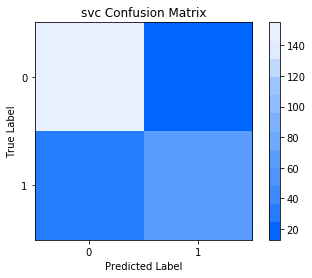

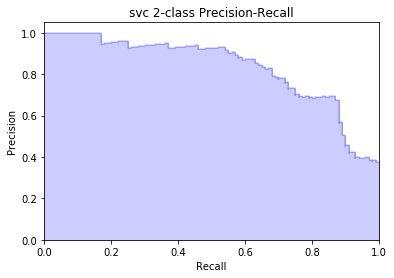

In [19]:
#支持向量机
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=6, decision_function_shape='ovr', probability=True, max_iter=5000)
svc.fit(X_train, Y_train)
train_pred = svc.predict(X_train)
test_pred = svc.predict(X_test)
pre_score = svc.predict_proba(X_test)[:, 1]
y_test_score = svc.decision_function(X_test)
print("支持向量机模型参数：{parameter}".format(parameter=svc))
auto_model_analysis("svc", Y_train, train_pred, Y_test, test_pred, pre_score)